In [1]:
import pandas as pd
from nxfvars import nxfvars
from glob import glob
import scanpy as sc
import numpy as np

In [2]:
input_dir = nxfvars.get("input_dir", "../../data/20_integrate_scrnaseq_data/24_solo/")
adata_path = nxfvars.get(
    "adata_path",
    "../../data/20_integrate_scrnaseq_data/23_scvi_umap/integrated_merged_all_all_genes.umap_leiden.h5ad",
)

In [ ]:
doublet_df = pd.concat(
    [pd.read_csv(x, index_col=0) for x in glob(f"{input_dir}/*.csv")]
)

In [ ]:
doublet_df.index = doublet_df.index.str.replace("-0$", "", regex=True)

In [ ]:
adata = sc.read_h5ad(adata_path)

In [ ]:
adata.obs = adata.obs.join(doublet_df, how="left")

In [ ]:
np.sum(adata.obs["label"] == "doublet")

In [36]:
sc.pp.neighbors(adata, use_rep="X_scVI")
sc.tl.umap(adata)

In [39]:
sc.settings.set_figure_params(figsize=(10, 10))

In [43]:
adata_nodoublet = adata[adata.obs["label"] != "doublet", :]

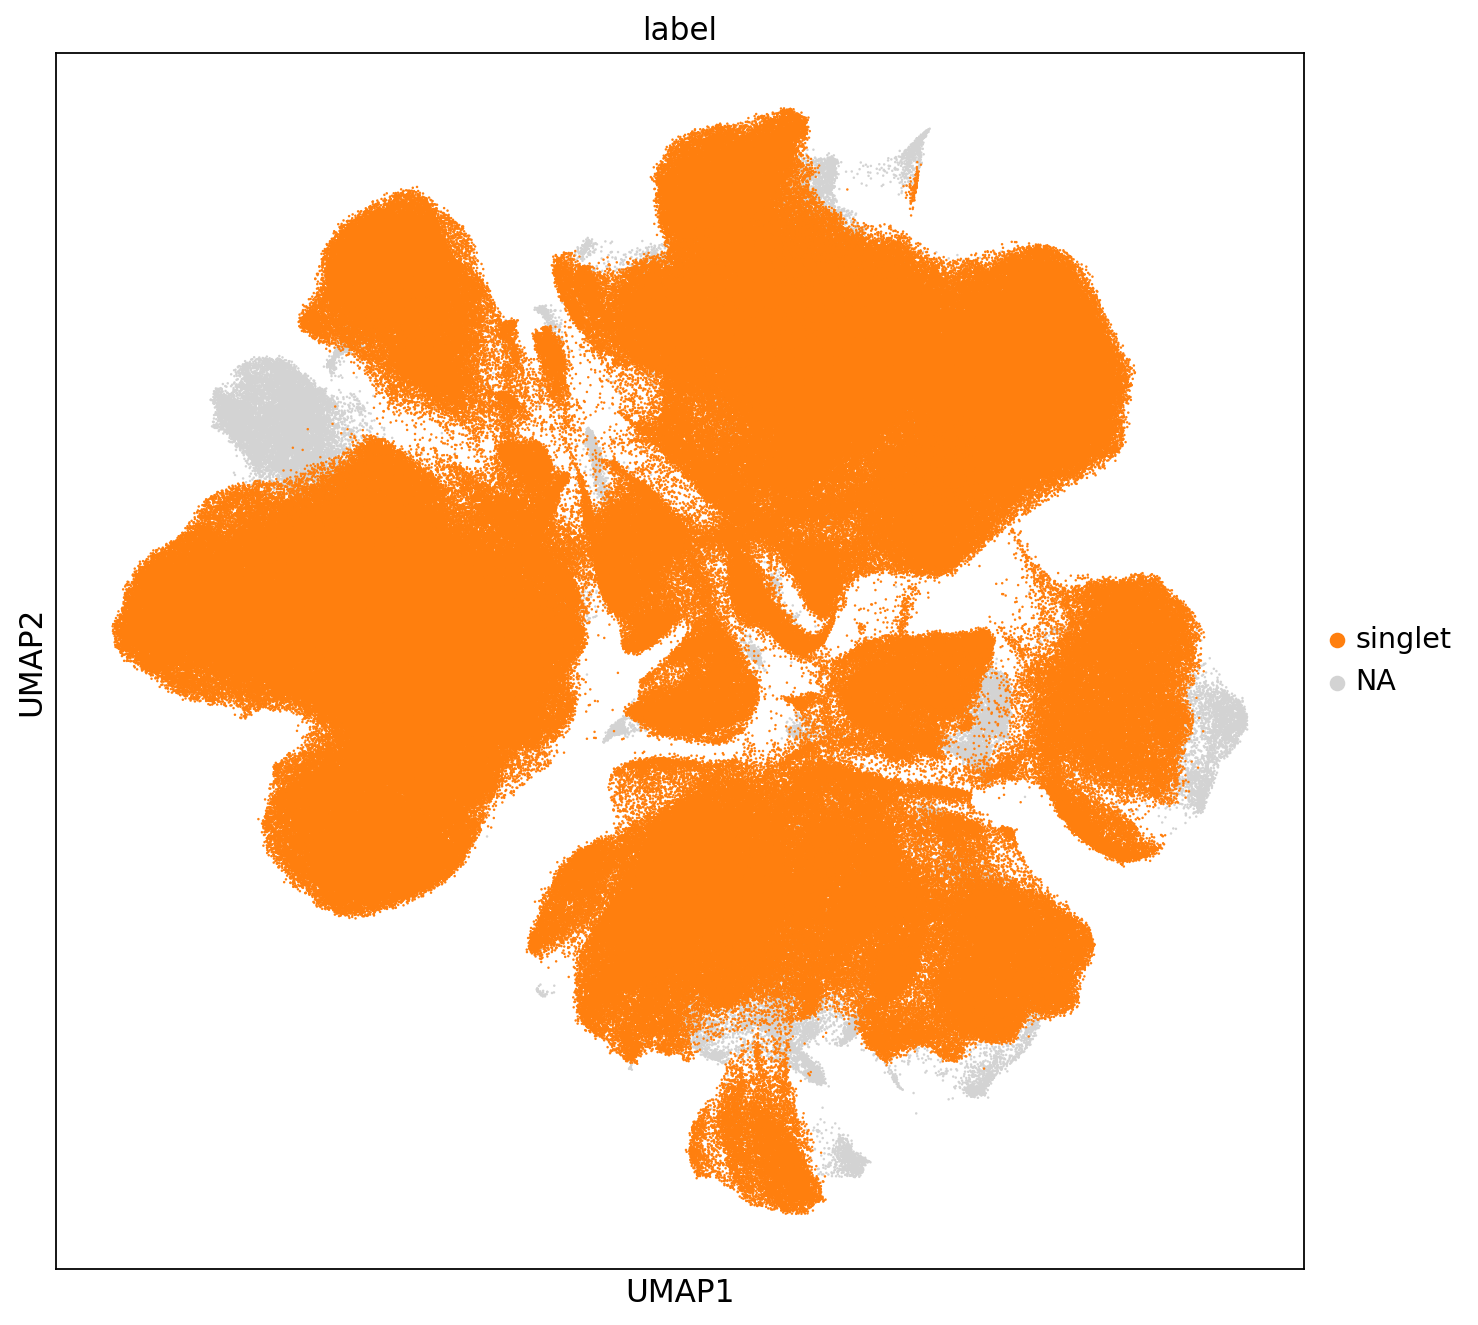

In [44]:
sc.pl.umap(adata_nodoublet, color="label", size=5)

In [48]:
pd.set_option("display.max_rows", 1000)

In [54]:
adata.obs.groupby("sample").apply(
    lambda df: pd.DataFrame().assign(
        doublet_frac=[np.sum(df["label"] == "doublet") / df.shape[0]], n=[df.shape[0]]
    )
).sort_values("doublet_frac")

,,doublet_frac,n
sample,,,
Maynard_Bivona_2020_NSCLC_LT_S28,0,0.000000,379
Guo_Zhang_2018_NSCLC_P0913_TTH,0,0.000000,175
Guo_Zhang_2018_NSCLC_P0913_TTR,0,0.000000,174
Guo_Zhang_2018_NSCLC_P0913_TTY,0,0.000000,85
Guo_Zhang_2018_NSCLC_P1010_NTC,0,0.000000,92
Guo_Zhang_2018_NSCLC_P1010_NTH,0,0.000000,85
Guo_Zhang_2018_NSCLC_P1010_TTC,0,0.000000,182
Guo_Zhang_2018_NSCLC_P1010_TTH,0,0.000000,116
Guo_Zhang_2018_NSCLC_P1010_TTR,0,0.000000,117


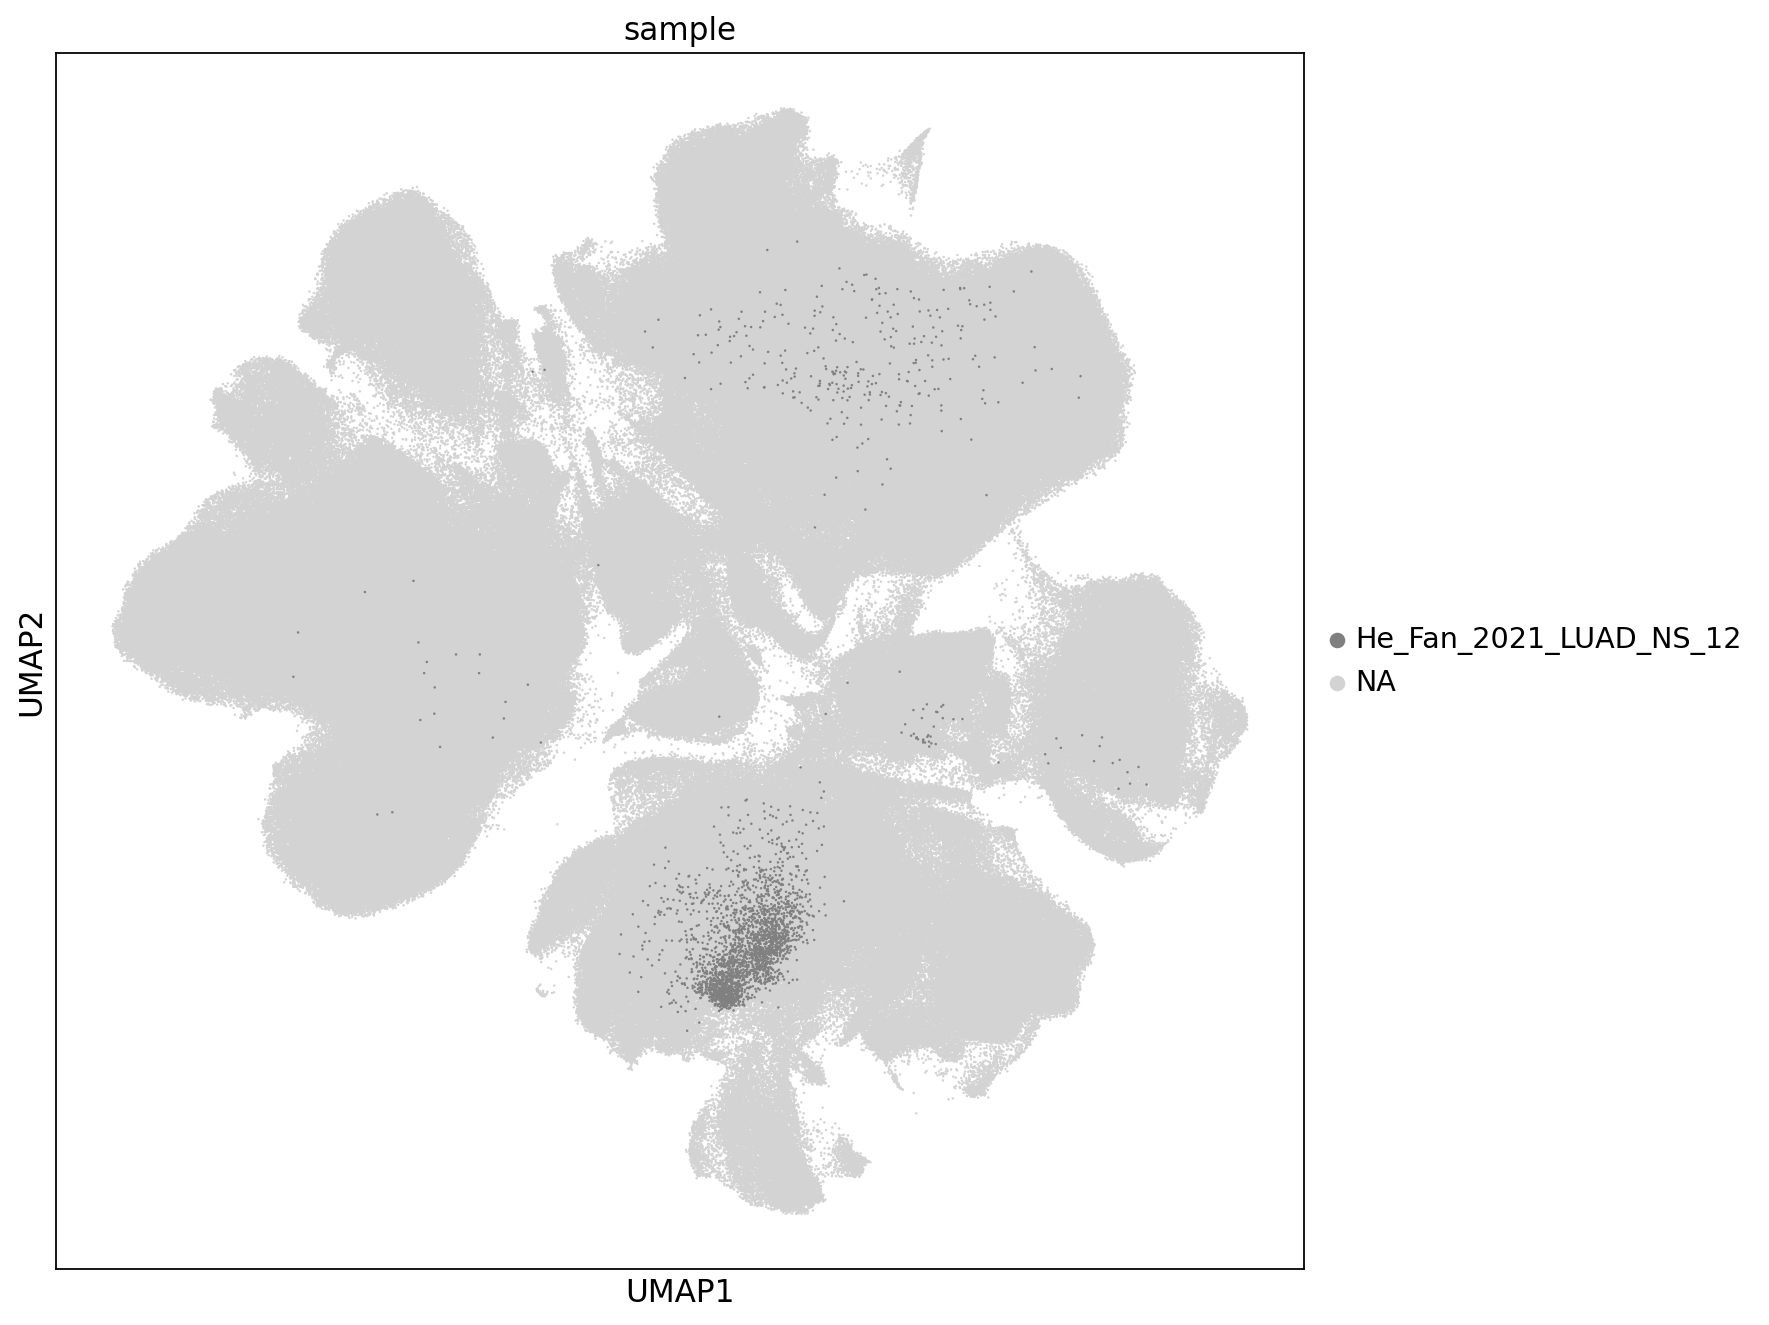

In [57]:
sc.pl.umap(adata, color="sample", groups=["He_Fan_2021_LUAD_NS_12"], size=5)

In [38]:
adata.write_h5ad("/home/sturm/Downloads/adata_doublets.h5ad")